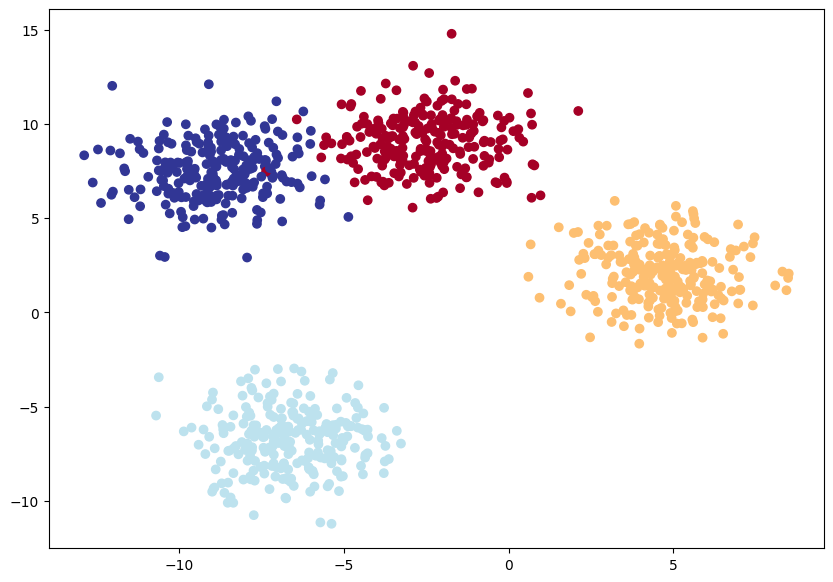

In [4]:
#Import dependencies
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visulize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);


In [5]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)

    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [7]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [8]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [9]:
# Create a loss fuction for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [10]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:5]

tensor([[-0.6393, -1.5239,  0.4054,  2.0447],
        [ 0.5659, -0.3550,  0.3606,  1.4020],
        [ 0.6861,  2.2572,  0.3575, -3.6000],
        [-0.4769, -0.7608,  0.3997,  0.7600],
        [-0.2756, -1.9970,  0.3914,  3.4847]], device='cuda:0')

In [11]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [12]:
# Convert our model's logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.6393, -1.5239,  0.4054,  2.0447],
        [ 0.5659, -0.3550,  0.3606,  1.4020],
        [ 0.6861,  2.2572,  0.3575, -3.6000],
        [-0.4769, -0.7608,  0.3997,  0.7600],
        [-0.2756, -1.9970,  0.3914,  3.4847]], device='cuda:0')
tensor([[0.0529, 0.0218, 0.1504, 0.7748],
        [0.2212, 0.0881, 0.1802, 0.5105],
        [0.1528, 0.7351, 0.1100, 0.0021],
        [0.1316, 0.0991, 0.3161, 0.4533],
        [0.0217, 0.0039, 0.0423, 0.9322]], device='cuda:0')


In [13]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [14]:
torch.max(y_pred_probs[0])

tensor(0.7748, device='cuda:0')

In [15]:
# Convert our model's prediction probalities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1,
        1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 2, 0, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1,
        1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
        1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3,
        1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3,
        3, 3, 1, 3, 3, 3, 1, 3], device='cuda:0')

In [16]:
torch.argmax(y_pred_probs[0])

tensor(3, device='cuda:0')

In [17]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [19]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [23]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epoch
epochs= 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss= loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6499, Acc: 66.75% | Test Loss: 0.5011, Test Acc: 76.00%
Epoch: 10 | Loss: 0.1539, Acc: 99.00% | Test Loss: 0.1377, Test Acc: 99.00%
Epoch: 20 | Loss: 0.0860, Acc: 99.00% | Test Loss: 0.0781, Test Acc: 99.50%
Epoch: 30 | Loss: 0.0632, Acc: 99.00% | Test Loss: 0.0560, Test Acc: 99.50%
Epoch: 40 | Loss: 0.0522, Acc: 99.00% | Test Loss: 0.0448, Test Acc: 99.50%
Epoch: 50 | Loss: 0.0459, Acc: 99.00% | Test Loss: 0.0383, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0418, Acc: 99.00% | Test Loss: 0.0339, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0390, Acc: 99.00% | Test Loss: 0.0309, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0369, Acc: 99.00% | Test Loss: 0.0286, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0354, Acc: 99.00% | Test Loss: 0.0269, Test Acc: 99.50%


In [24]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 prediction
y_logits[:10]

tensor([[ 4.3282e+00,  9.7502e+00, -1.1895e+01, -8.5155e+00],
        [ 3.5644e+00, -1.1729e+01,  1.5238e+00,  9.3203e+00],
        [-8.7127e+00, -1.3883e+01,  2.0742e+01,  1.1924e+01],
        [ 1.2649e+00,  6.8519e+00, -5.7476e+00, -5.9110e+00],
        [ 8.1351e+00,  3.2719e+00, -1.3762e+01, -3.4061e+00],
        [ 4.0192e+00, -1.4485e+01,  2.4355e+00,  1.1572e+01],
        [-8.9386e+00, -1.0882e+01,  1.9355e+01,  9.4547e+00],
        [ 6.7100e+00, -7.0842e-01, -9.3953e+00, -1.5070e-02],
        [-9.0782e+00, -1.8937e+01,  2.4172e+01,  1.6133e+01],
        [ 7.0863e+00,  7.3510e-01, -1.0773e+01, -1.2355e+00]], device='cuda:0')

In [25]:
# Go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[4.3992e-03, 9.9560e-01, 3.9603e-10, 1.1625e-08],
        [3.1528e-03, 7.1904e-10, 4.0968e-04, 9.9644e-01],
        [1.6134e-13, 9.1718e-16, 9.9985e-01, 1.4797e-04],
        [3.7325e-03, 9.9626e-01, 3.3611e-06, 2.8546e-06],
        [9.9232e-01, 7.6670e-03, 3.0676e-10, 9.6474e-06],
        [5.2453e-04, 4.8260e-12, 1.0764e-04, 9.9937e-01],
        [5.1549e-13, 7.3822e-14, 9.9995e-01, 5.0152e-05],
        [9.9820e-01, 5.9900e-04, 1.0111e-07, 1.1982e-03],
        [3.6266e-15, 1.8968e-19, 9.9968e-01, 3.2260e-04],
        [9.9802e-01, 1.7411e-03, 1.7493e-08, 2.4268e-04]], device='cuda:0')

In [26]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping ")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


Download helper_functions.py


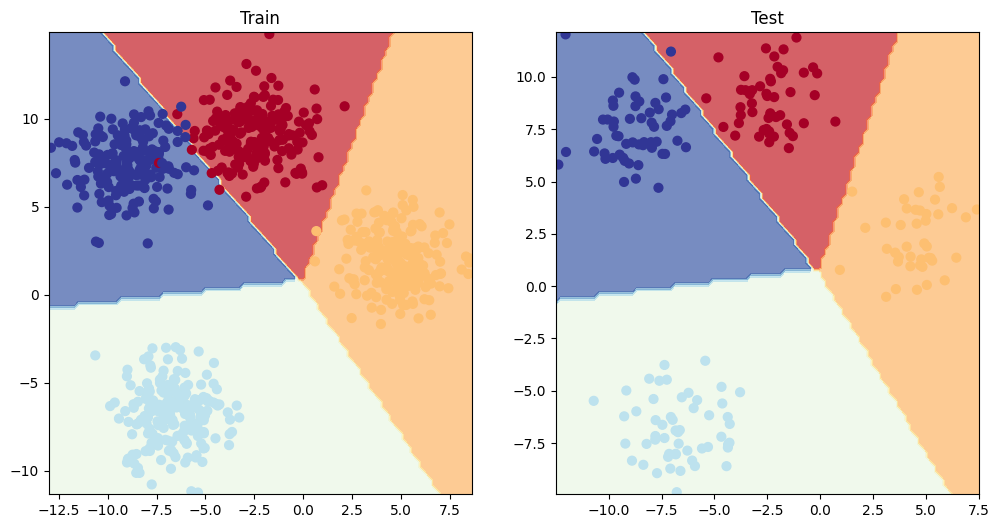

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)